AlphaCare Insurance Solutions (ACIS) 

In [42]:


# Import necessary libraries
import os
import pandas as pd
import sys

# Adding the '../scripts' directory to the system path to import custom modules
sys.path.append(os.path.abspath('../scripts'))

# Importing necessary modules for data processing and loading data from zip files
from data_processing import DataProcessing
from extract_zip import load_data



In [43]:
# Define paths
current_dir = os.getcwd()
zip_file_path = os.path.join(current_dir, '../data/MachineLearningRating_v3.zip')
extract_to = os.path.join(current_dir, '../data/')
txt_filename = "MachineLearningRating_v3.txt"

In [44]:


# Load data
print("Loading and processing data...")
try:
    df = load_data(zip_file_path, txt_filename)
    print("Data loaded successfully.")
except RuntimeError as e:
    print(f"Error loading data: {str(e)}")



Loading and processing data...
Data loaded successfully.


In [45]:
# Display first few rows of the data
print("\nPreview of the loaded data:")
display(df.head())


Preview of the loaded data:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [46]:


# Find the number of rows and columns
df.shape



(1000098, 52)

In [47]:
# Initialize DataProcessing instance
data_processor = DataProcessing(df)
print("✅ DataProcessing instance initialized successfully with the provided DataFrame.")

✅ DataProcessing instance initialized successfully with the provided DataFrame.


In [48]:
# Missing data summary
print("\nMissing Data Summary:")
missing_summary = data_processor.missing_data_summary()
display(missing_summary)


Missing Data Summary:


,Missing Count,Percentage (%)
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
CustomValueEstimate,779642,77.956560
WrittenOff,641901,64.183810
Converted,641901,64.183810
Rebuilt,641901,64.183810
NewVehicle,153295,15.327998
Bank,145961,14.594670
AccountType,40232,4.022806
Gender,9536,0.953507


In [49]:
cols_to_drop = ['NumberOfVehiclesInFleet', 
                'CrossBorder', 
                'CustomValueEstimate', 
                'Converted', 'Rebuilt', 
                'WrittenOff']

# Drop these columns
data = data_processor.handle_missing_data('high', cols_to_drop)

print(f"Dropped columns with high missing data: {', '.join(cols_to_drop)}")

Dropped columns with high missing data: NumberOfVehiclesInFleet, CrossBorder, CustomValueEstimate, Converted, Rebuilt, WrittenOff


In [50]:
# Impute or drop columns with moderate missing data
missing_cols = ['NewVehicle', 'Bank', 'AccountType']
data = data_processor.handle_missing_data('moderate', missing_cols)

print(f"Imputed columns with moderate missing data: {', '.join(missing_cols)}")

Imputed columns with moderate missing data: NewVehicle, Bank, AccountType


In [51]:


# Handle low missing data (standard imputation)
missing_cols = ['Gender', 'MaritalStatus', 'Cylinders', 'cubiccapacity', 
                'kilowatts', 'NumberOfDoors', 'VehicleIntroDate', 'Model', 
                'make', 'VehicleType', 'mmcode', 'bodytype', 'CapitalOutstanding']

data = data_processor.handle_missing_data('low', missing_cols)

print(f"Imputed columns with low missing data: {', '.join(missing_cols)}")



Imputed columns with low missing data: Gender, MaritalStatus, Cylinders, cubiccapacity, kilowatts, NumberOfDoors, VehicleIntroDate, Model, make, VehicleType, mmcode, bodytype, CapitalOutstanding


In [52]:
# Check duplicates
data.duplicated().sum()

np.int64(74)

                    ## Duplicates data

In [53]:
# Display the duplicated rows
duplicates = data[data.duplicated()]
print(duplicates)

        UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
140792                92857      5279  2015-03-01 00:00:00            False   
140819                68955      5279  2015-08-01 00:00:00            False   
142437                68954      5279  2015-03-01 00:00:00            False   
147024                92857      5279  2015-08-01 00:00:00            False   
724410               133274     11364  2015-05-01 00:00:00            False   
...                     ...       ...                  ...              ...   
899911               133278     11364  2015-05-01 00:00:00            False   
899913               133278     11364  2015-07-01 00:00:00            False   
899918               133276     11364  2015-02-01 00:00:00            False   
899921               133272     11364  2015-04-01 00:00:00            False   
899924               133272     11364  2015-06-01 00:00:00            False   

       Citizenship   LegalType Title Language      

In [54]:
# Remove duplicates, keeping the first occurrence
data_cleaned = data.drop_duplicates()

# To reset the index after dropping duplicates
data_cleaned.reset_index(drop=True, inplace=True)

# Verify the number of duplicates remaining
print("Remaining duplicates:", data_cleaned.duplicated().sum())

Remaining duplicates: 0


In [55]:
print(data.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


In [56]:


# Get numerical features to Descriptive Statistics
numerical_features = data.select_dtypes(include=['number'])

# Print the numerical features
print(numerical_features.columns.tolist())



['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']


In [57]:


# Statistic summary of numerical features
num_cols = ['UnderwrittenCoverID','PolicyID','RegistrationYear','NumberOfDoors','SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
display(data[num_cols].describe())



,UnderwrittenCoverID,PolicyID,RegistrationYear,NumberOfDoors,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,2.010225e+03,4.019239e+00,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,3.261391e+00,4.681854e-01,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.987000e+03,0.000000e+00,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,2.008000e+03,4.000000e+00,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.011000e+03,4.000000e+00,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,2.013000e+03,4.000000e+00,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,2.015000e+03,6.000000e+00,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


### Data set overview

    ###Total Records: The dataset contains  1,000,098 entries

     ###Underwritten Cover ID Mean: 104,817

     ###Policy ID Mean: 7,957

     ###Number of Doors Mean: 4 doors

     ###Sum Insured Mean: 604,173 

     ###Calculated Premium Per Term Mean: 117.88

     Total Premium Mean: 61.91
    ranges: From -782.58  to 65,282.60.

     Total Claims Mean:  64.86
     ranges:  From -12,002.41  to 393,092.10.




### Data structure

In [58]:

# Check the Data types of each column
data_types = data.dtypes

data_types.reset_index(name='data type')



,index,data type
0,UnderwrittenCoverID,int64
1,PolicyID,int64
2,TransactionMonth,object
3,IsVATRegistered,bool
4,Citizenship,object
5,LegalType,object
6,Title,object
7,Language,object
8,Bank,object
9,AccountType,object


In [59]:
print(data['VehicleIntroDate'].unique())

['6/2002' '3/2004' '2/2003' '6/2005' '2008/11/01 12:00:00 AM' '11/2010'
 '2008/08/01 12:00:00 AM' '5/2004' '2/2006' '8/2005'
 '2013/04/01 12:00:00 AM' '4/2007' '1/2012' '11/2006' '11/2007' '10/2010'
 '4/2012' '8/2006' '11/1992' '3/2005' '5/2010' '2014-02-01 12:00:00 AM'
 '7/2011' '3/2007' '11/1996' '12/2009' '4/2008' '10/1/2013 12:00:00 AM'
 '10/1996' '2006/07/01 12:00:00 AM' '3/2008' '7/2004' '8/2011' '8/2007'
 '8/2001' '10/2005' '8/2009' '8/2010' '11/2011' '10/2011' '1/2009'
 '10/1991' '10/2006' '3/2009' '2007/06/01 12:00:00 AM'
 '2007/03/01 12:00:00 AM' '10/2000' '7/2003' '8/2003' '5/2005' '10/1995'
 '6/1999' '9/1993' '3/2006' '9/1994' '2/2010' '4/2005' '11/1991' '10/1992'
 '9/2010' '6/2001' '2/2004' '12/1/2013 12:00:00 AM' '7/2010'
 '8/1/2013 12:00:00 AM' '10/2007' '1/2010' '9/1/2013 12:00:00 AM'
 '2012/03/01 12:00:00 AM' '4/1993' '2001/10/01 12:00:00 AM' '1/2003'
 '6/2007' '1992/03/01 12:00:00 AM' '9/2002' '9/2007' '7/1995' '1/2002'
 '2/1998' '1/1998' '12/2011' '2014-09-01 12:00:0

In [60]:
print(data['VehicleIntroDate'].dtype)

object


In [61]:


# Convert the VehicleIntroDate column from object to datetime format.
data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'], format='%d/%m/%Y', errors='coerce')

print("Object converted to datetime successfully.")



Object converted to datetime successfully.


In [62]:
# Check the datatype of VehicleIntroDate
print(data['VehicleIntroDate'].dtype)

datetime64[ns]


###Data Summerization   

univarate analysis

In [63]:

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))



In [64]:
from data_visualization import DataVisualizer

In [65]:
# Initialize DataVisualizer instance
visualizer = DataVisualizer(df)
print("✅ DataVisualizer instance initialized successfully.")

✅ DataVisualizer instance initialized successfully.


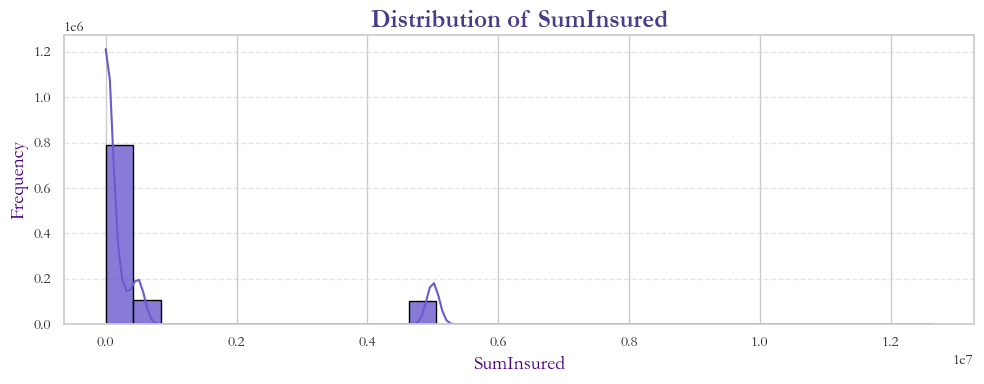

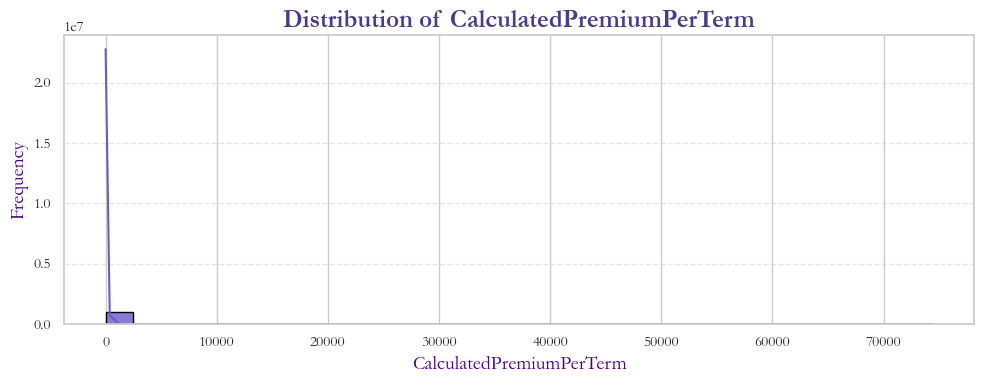

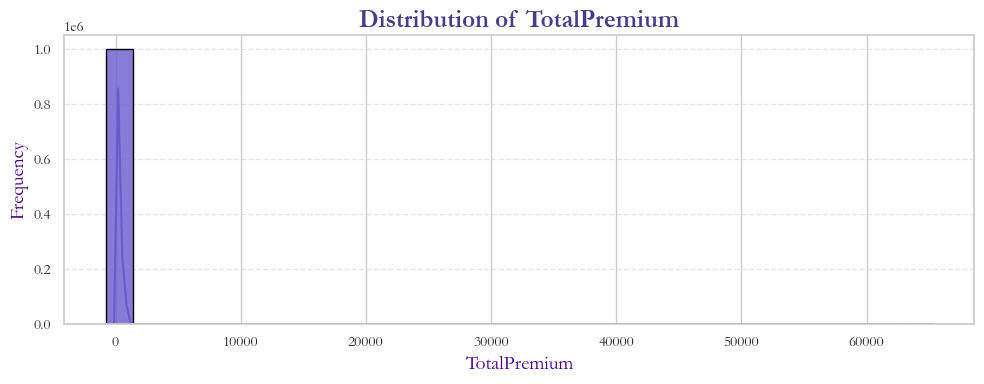

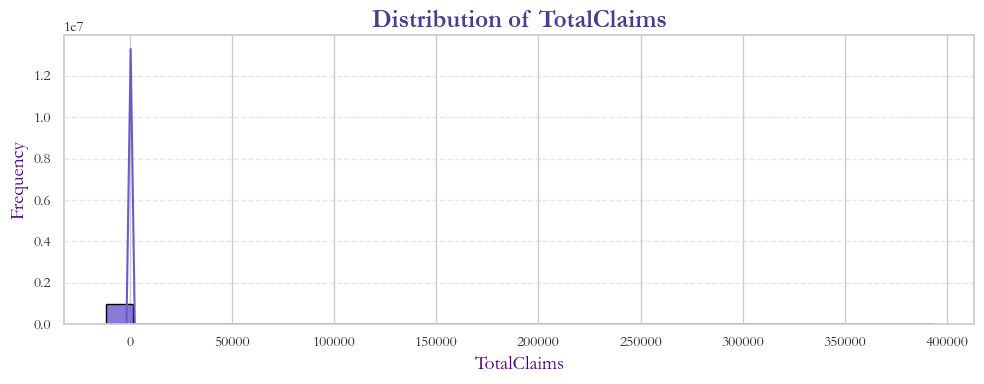

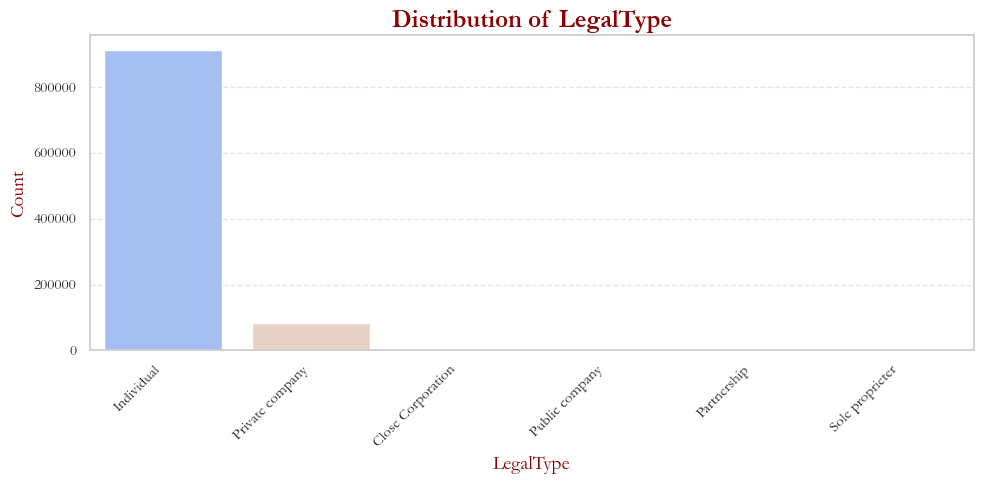

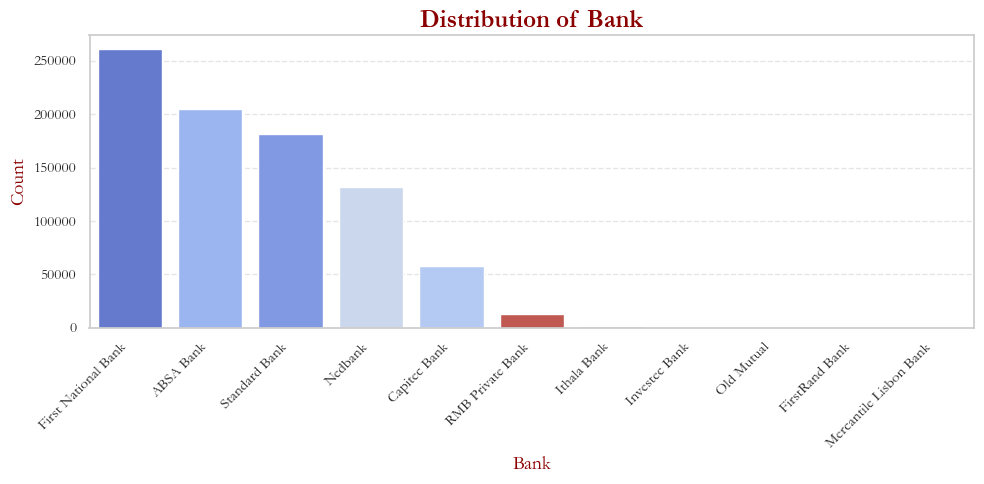

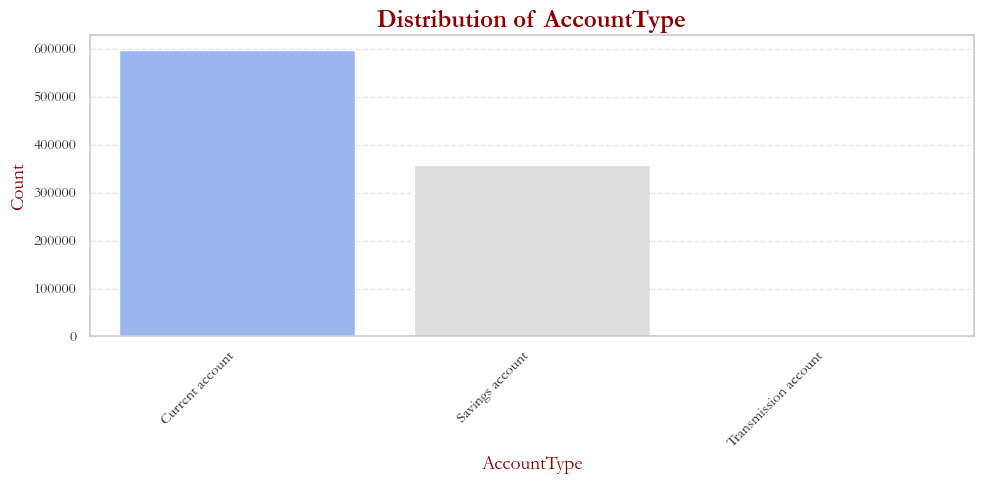

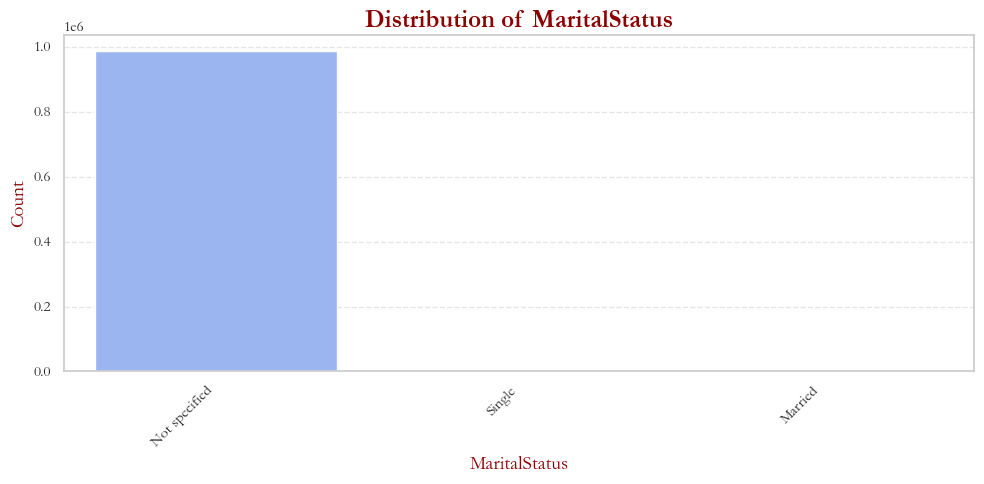

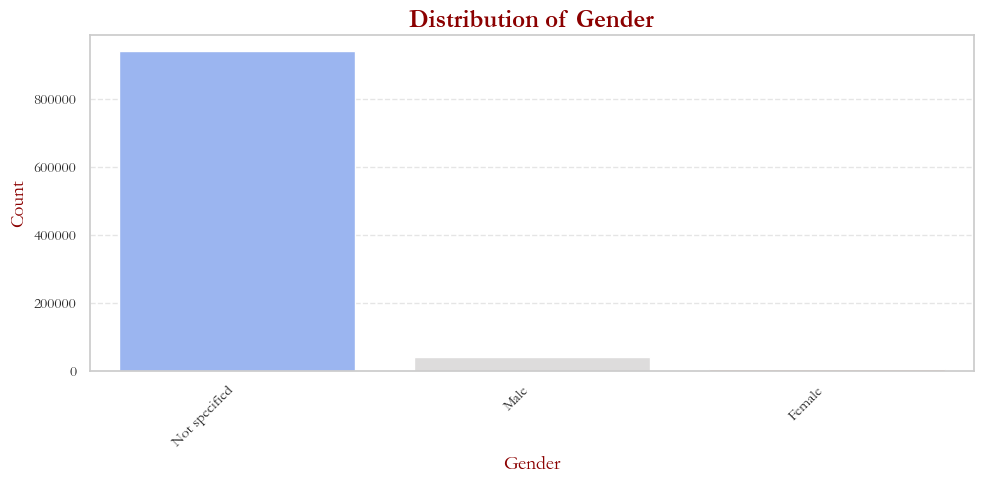

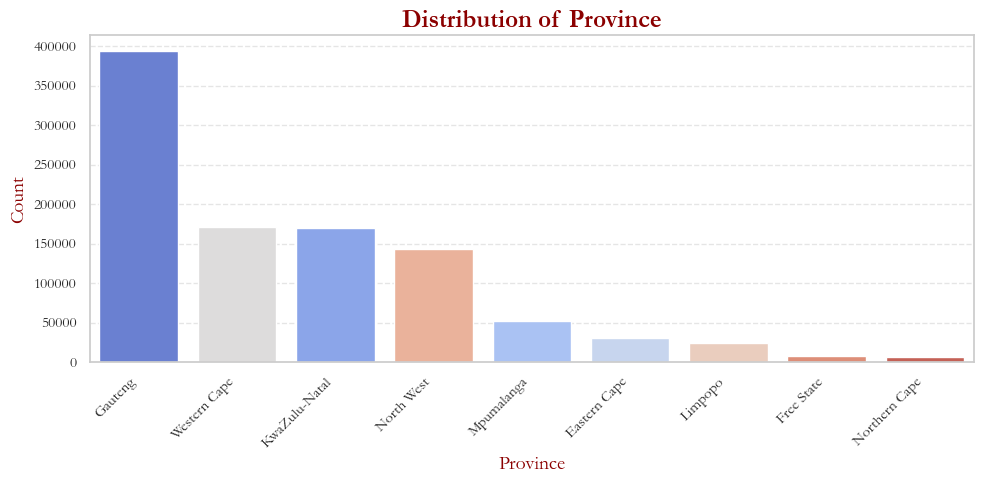

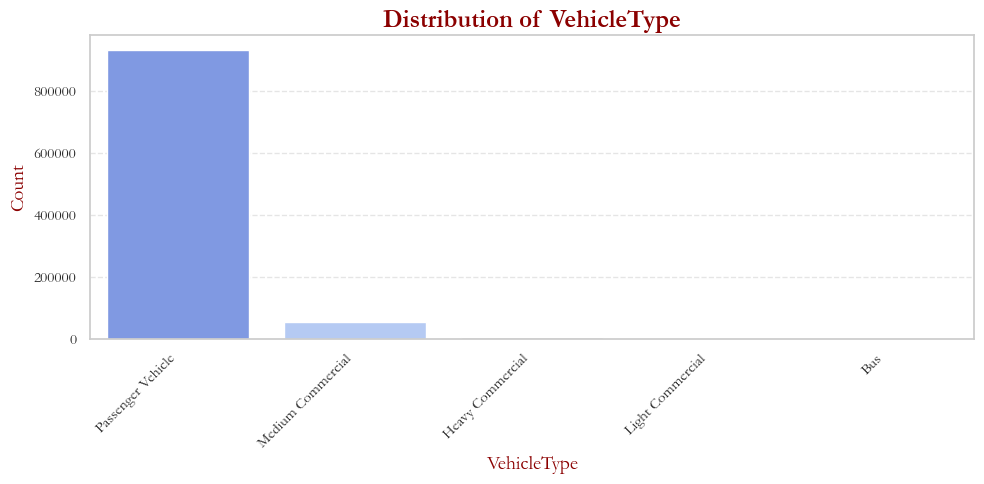

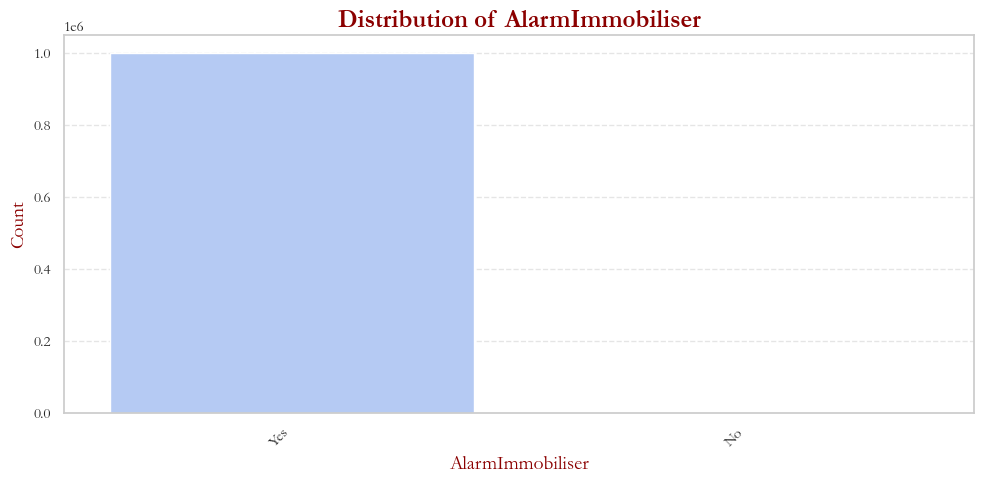

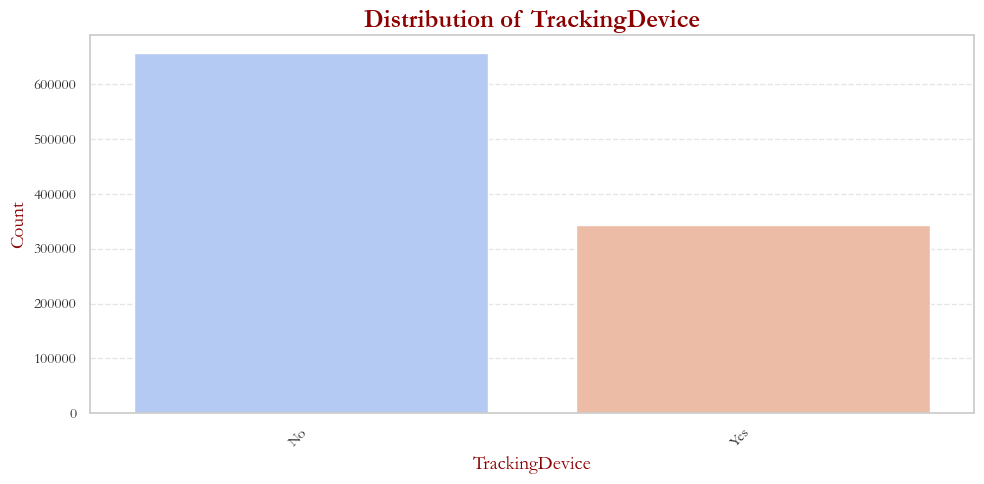

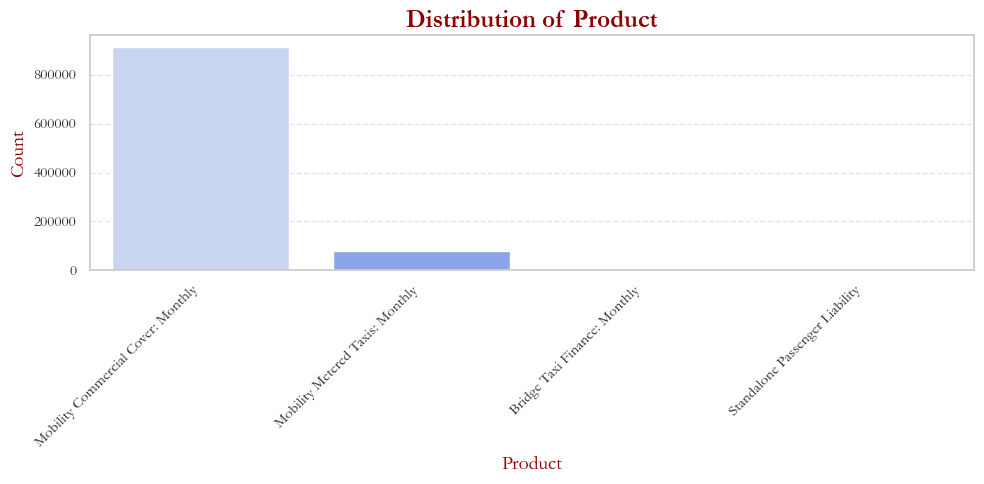

In [66]:
# Create an instance of the DataVisualizer class
visualizer = DataVisualizer(df)

# Define lists for numerical and categorical columns
numerical_columns = [
    'SumInsured',
    'CalculatedPremiumPerTerm',
    'TotalPremium',
    'TotalClaims'
]

categorical_columns = [
    'LegalType',
    'Bank',
    'AccountType',
    'MaritalStatus',
    'Gender',
    'Province',
    'VehicleType',
    'AlarmImmobiliser',
    'TrackingDevice',
    'Product'
]

# Perform univariate analysis on both numerical and categorical columns
visualizer.univariate_analysis(numerical_columns, categorical_columns)

###Bivarate Analysis

In [67]:
# Define x and y columns
x_col = 'TotalPremium'
y_col = 'TotalClaims'
col_hue = 'PostalCode'

# Print statements to clarify the columns being used
print(f"X Column (Independent Variable): {x_col} - This represents the total premium amounts.")
print(f"Y Column (Dependent Variable): {y_col} - This indicates the total claims made.")
print(f"Color Hue Column: {col_hue} - This categorizes the data by postal code.")

X Column (Independent Variable): TotalPremium - This represents the total premium amounts.
Y Column (Dependent Variable): TotalClaims - This indicates the total claims made.
Color Hue Column: PostalCode - This categorizes the data by postal code.


In [68]:


# Create an instance of the DataVisualizer class
visualize = DataVisualizer(data)


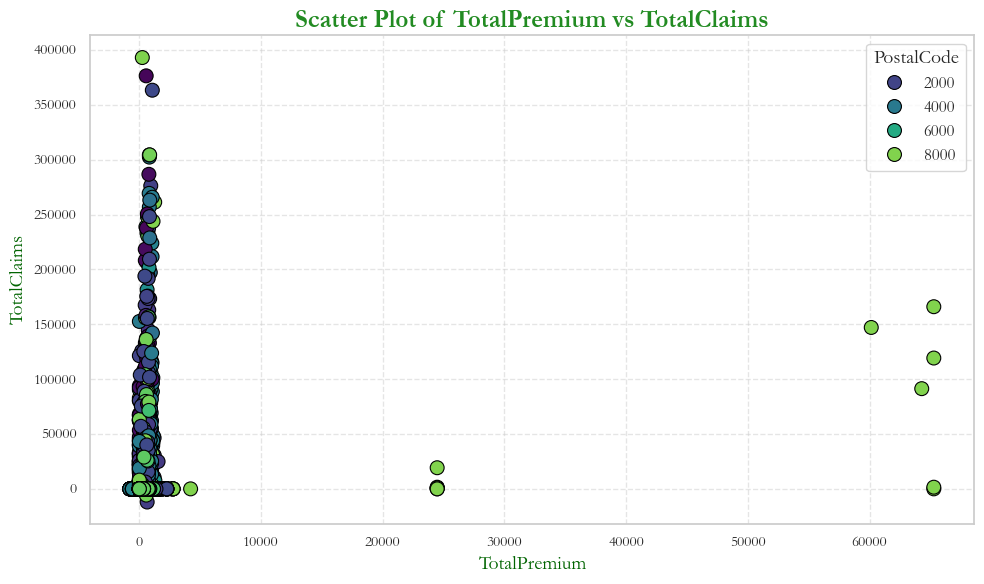

In [69]:


# Plot scatter plot
visualize.scatter_plot(x_col, y_col, col_hue)


###Bivariate or Multivariate Analysis:
Correlations

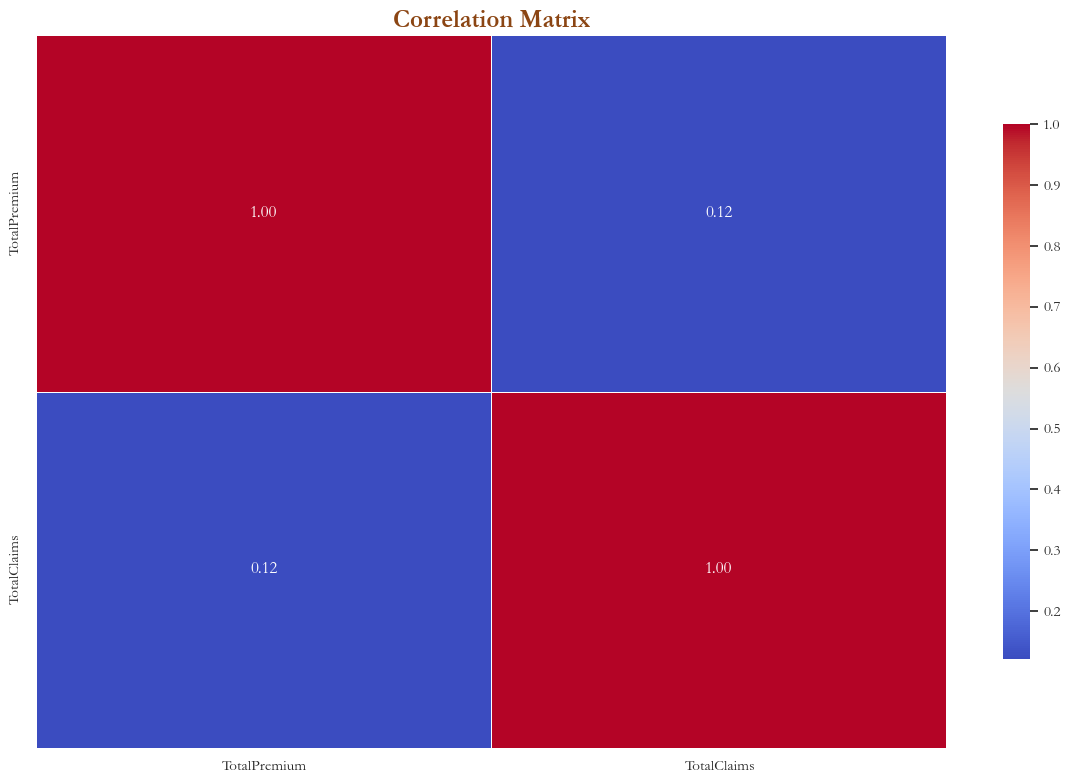

In [70]:
cols = ['TotalPremium', 'TotalClaims']

visualize.correlation_matrix(cols)

##Weak Correlation Value: The correlation coefficient between Total Premium and Total Claims is 0.12.

##Data Comparison

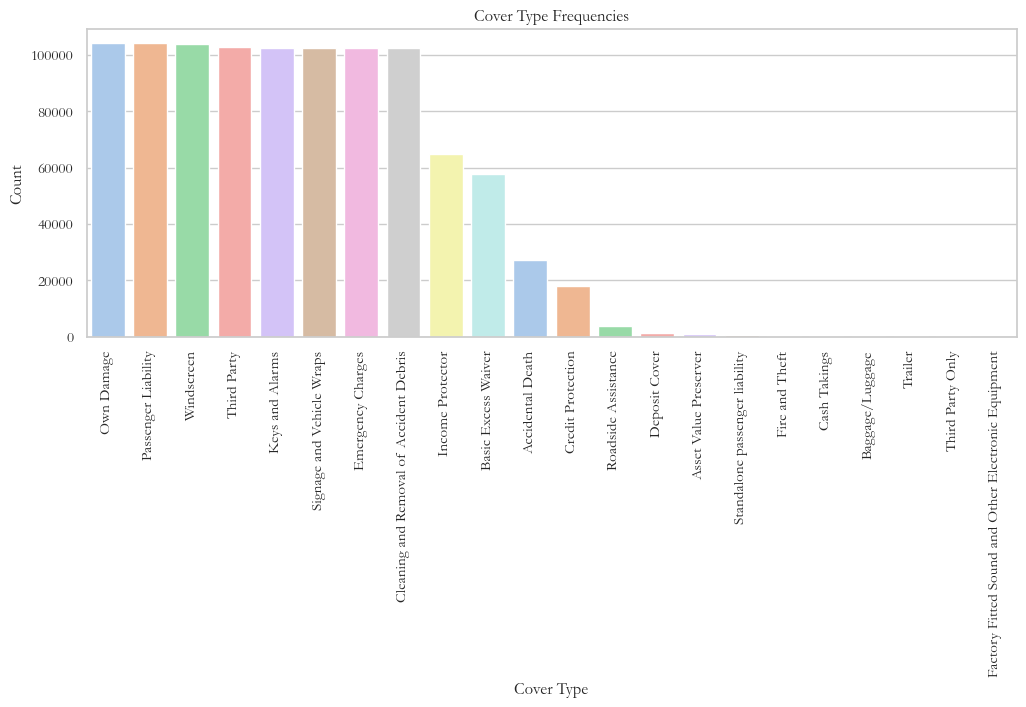

In [71]:
# Cover type frequence distributions across the regions

cover_type_counts = data['CoverType'].value_counts()

# Create a bar chart with a color palette
plt.figure(figsize=(12, 4))
sns.barplot(x=cover_type_counts.index, y=cover_type_counts, 
            hue=cover_type_counts.index, legend=False,palette='pastel')
plt.title('Cover Type Frequencies')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels to the bottom
plt.show()

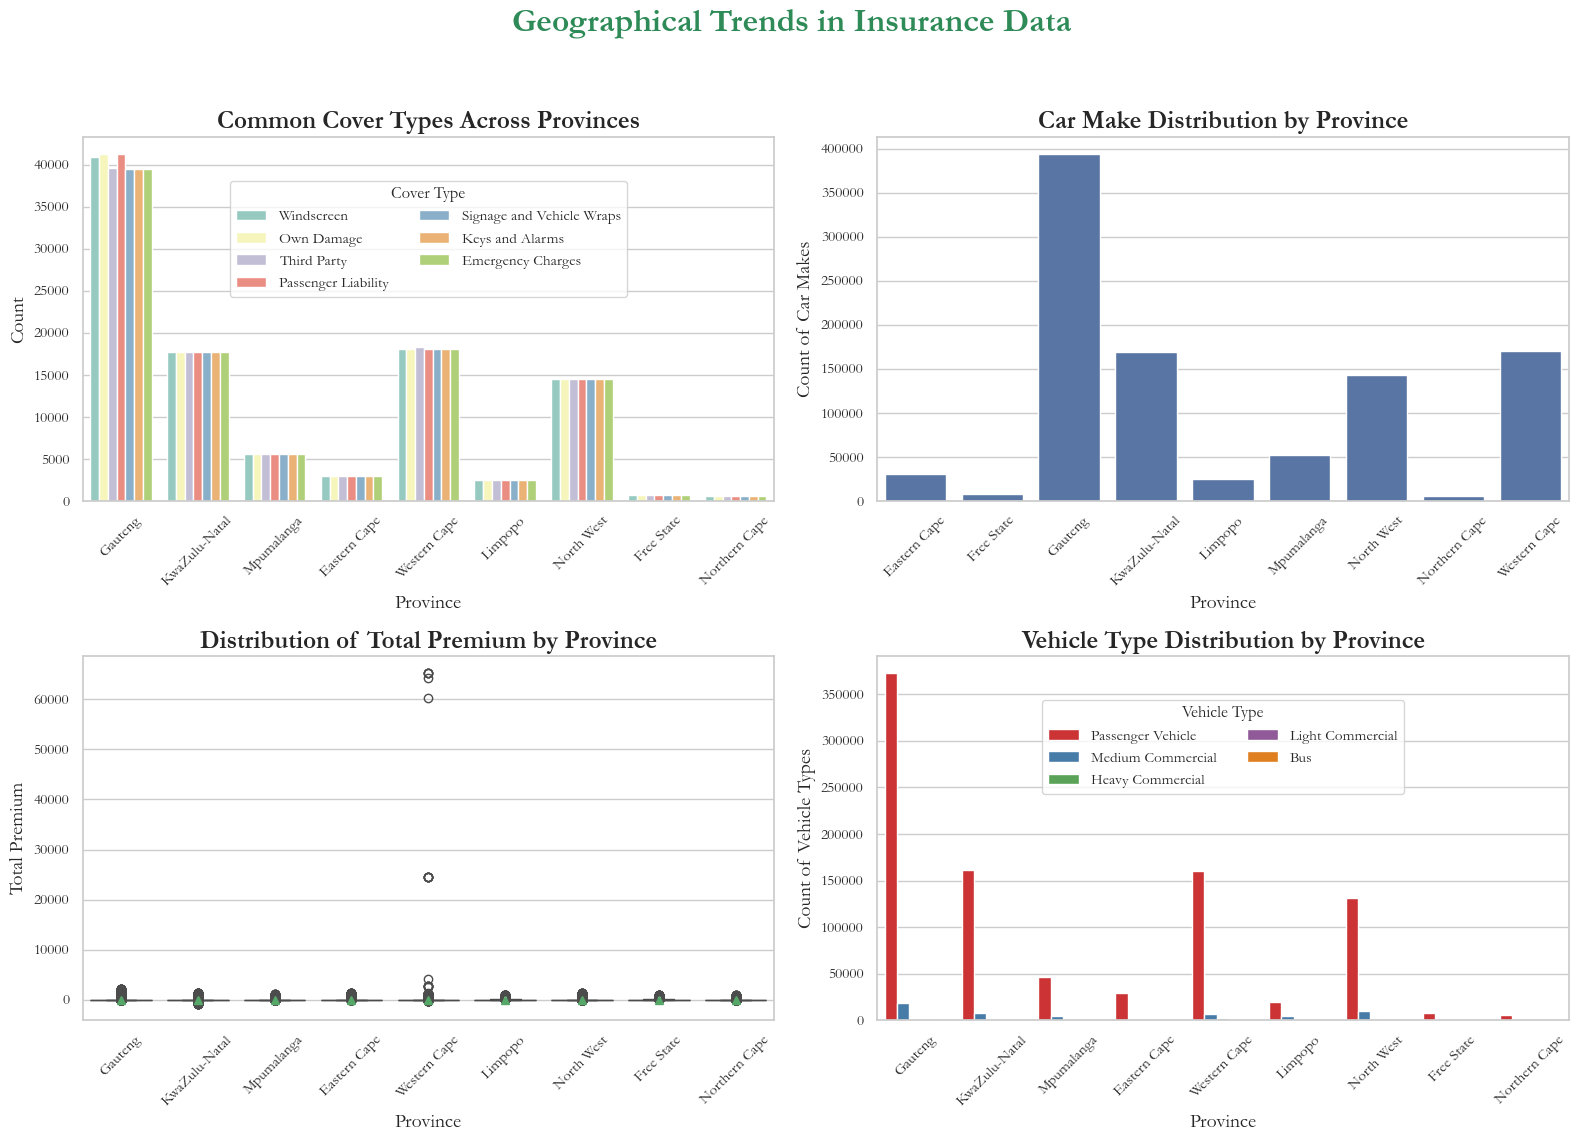

In [72]:
# Define the most common cover types
common_cover_types = [
    'Own Damage', 'Passenger Liability', 'Windscreen', 'Third Party', 
    'Keys and Alarms', 'Signage and Vehicle Wraps', 'Emergency Charges', 
    'Cleaning and Removal of Accidental Debris'
]

# Plot the distribution accross regions
visualize.plot_geographical_trends(common_cover_types)

##Outlier Detection:

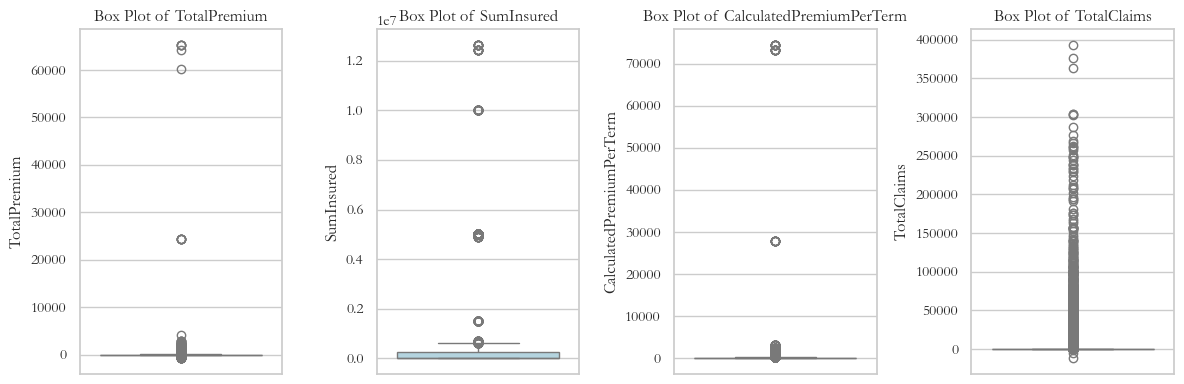

In [73]:


# Define numerical columns to detect outliers
numerical_cols = ['TotalPremium', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalClaims']
# Detect outliers using boxplot
visualize.plot_outliers_boxplot(numerical_cols)


#Visualization

In [74]:


# Capping outliers of the numerical variables
df_capped = visualize.cap_all_outliers(numerical_cols)

# Print statement to inform about the capping process
print("Outliers have been capped for the following numerical variables:")
print(numerical_cols)
print("Resulting DataFrame shape:", df_capped.shape)



Outliers have been capped for the following numerical variables:
['TotalPremium', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalClaims']
Resulting DataFrame shape: (1000098, 46)


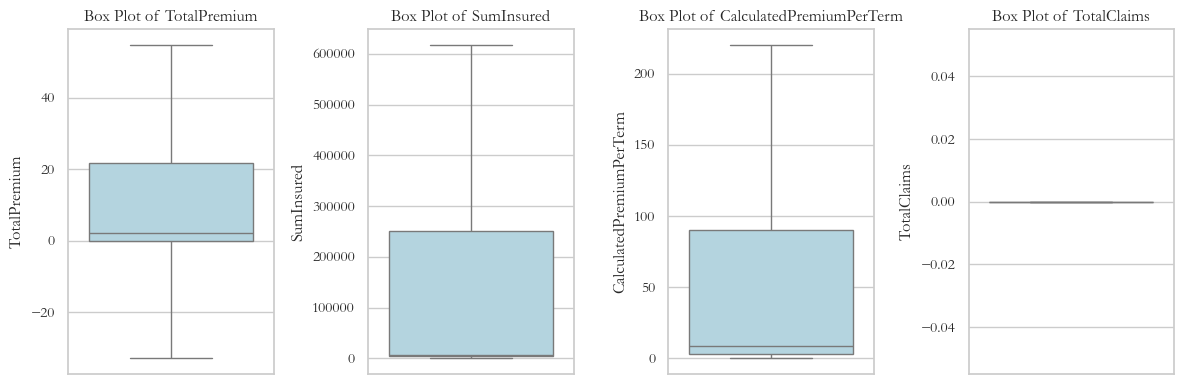

In [75]:


# Check outliers after the outliers were capped
vis1 = DataVisualizer(df_capped)
vis1.plot_outliers_boxplot(numerical_cols)



In [76]:


# Save the cleaned data to CSV for future analysis
df_capped.to_csv('../data/cleaned_data.csv')

# Print statement to confirm saving
print("✅ Cleaned data has been saved to '../data/cleaned_data.csv'.")



✅ Cleaned data has been saved to '../data/cleaned_data.csv'.


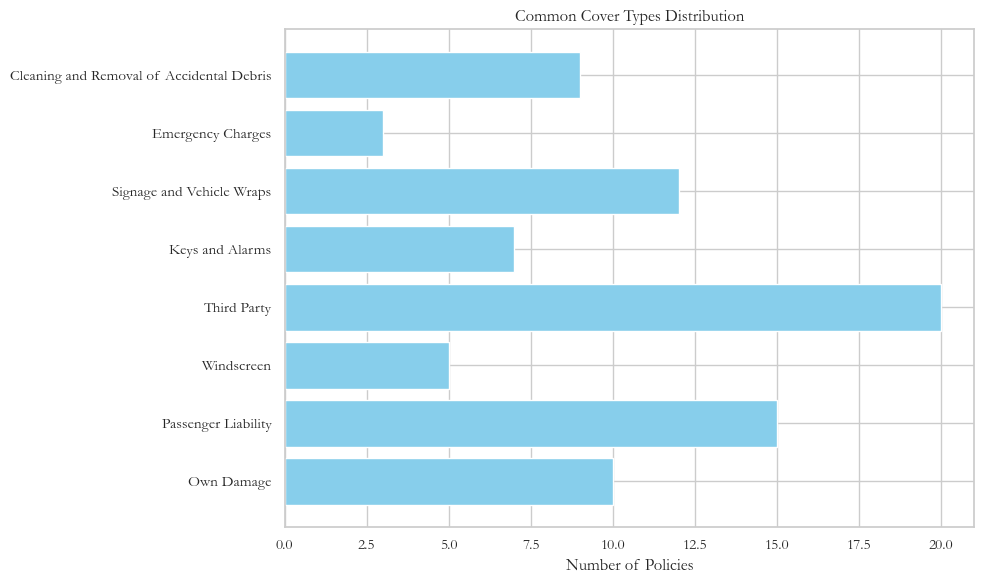

In [77]:
import matplotlib.pyplot as plt

# Define the most common cover types
common_cover_types = [
    'Own Damage', 'Passenger Liability', 'Windscreen', 'Third Party', 
    'Keys and Alarms', 'Signage and Vehicle Wraps', 'Emergency Charges', 
    'Cleaning and Removal of Accidental Debris'
]

# Example data for illustration (replace with your actual data)
cover_type_counts = [10, 15, 5, 20, 7, 12, 3, 9]

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(common_cover_types, cover_type_counts, color='skyblue')
plt.xlabel('Number of Policies')
plt.title('Common Cover Types Distribution')
plt.tight_layout()

# Save the figure
plt.savefig('../Screenshots/geographical_trends.png', dpi=300, bbox_inches='tight')
plt.show()

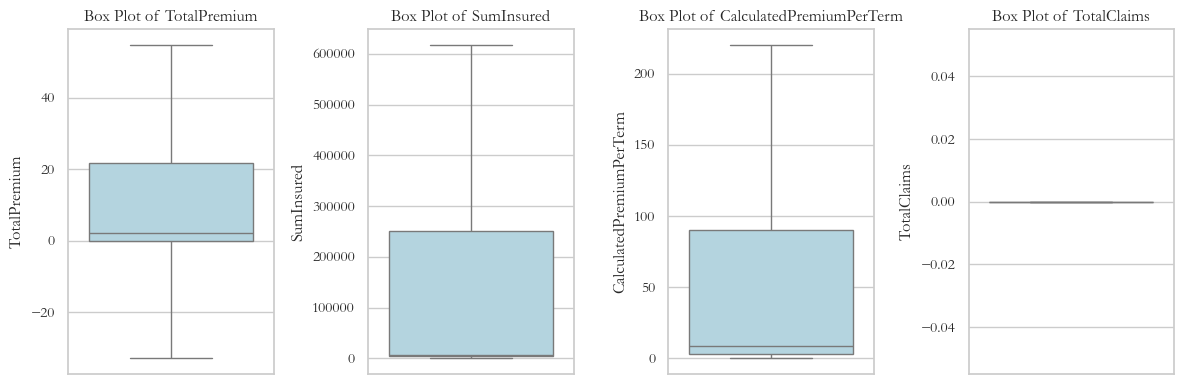

In [82]:
# Define numerical columns to detect outliers
numerical_cols = ['TotalPremium', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalClaims']

# Detect outliers using boxplot
visualize.plot_outliers_boxplot(numerical_cols)

# Save the boxplot figure
plt.savefig('../Screenshots/outliers_boxplot.png', dpi=300, bbox_inches='tight')
plt.close()  # Close to avoid overlap with the next plot
plt.show()